# 머신러닝 알고리즘

In [ ]:
'''
머신러닝 알고리즘은 학습 시스템(방법)에 정보 및 데이터를 입력하는 형태에 따라 나눠짐

1) 감독(지도--Superviserd) 학습 : 입력과 이에 대응하는 출력을 매핑(mapping)하는 함수를 학습하는 과정
                               : 입력, 출력 데이터 모두 사람이 제공  -- 독립변수, 종속변수, 학습방법 모두 제공
                               : 대부분의 머신러닝이 여기에 해당
                               
                               * 회귀 : 숫자값을 예측. 보통 연속된 숫자(실수)를 예측
                               * 분류 : 입력 데이터들을 주어진 항목(클래스)들로 나누기
                               * 랭킹/추천 : 데이터들의 순위를 예측
                   
2) 비감독(Unsupervisered) 학습  : 출력 없이 입력만으로 모델을 구축하여 학습
                               : 대부분의 데이터마이닝 기법이 비감독 학습에 해당
                               
3) 강화(Reinforcement)학습      : 일반적으로 딥러닝과 혼용됨 -- 용어에 대한 경계가 없어지는 추세
                               : 학습자가 행동을 선택하여 행동으로 환경에 영향을 미치고,
                               : 이에 대한 피드백으로 보상을 얻는 방식으로서, 학습 알고리즘의 가이드로 사용
'''

# 분류 (클래스 예측)
### MNIST 데이터셋 (손글씨 데이터셋)

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X = mnist['data']
X.shape

(70000, 784)

In [6]:
y = mnist['target']
y.shape

(70000,)

In [7]:
# 샘플 하나만 추출
pick_digit = X[:1]
pick_digit

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# 이미지화
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [10]:
pick_digit_img = np.array(pick_digit).reshape(28, 28)
pick_digit_img

# 이미지를 픽셀 단위의 RGB값으로 처리

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

<function matplotlib.pyplot.show(close=None, block=None)>

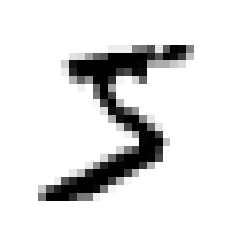

In [11]:
plt.imshow(pick_digit_img, cmap='binary')
plt.axis('off')
plt.show

# 비슷한 위치에 비슷한 rgb값이 있으면 같은 숫자(이미지)라고 인식을 하게 됨

In [12]:
y[0]

'5'

In [13]:
# Label type casting
# 레이블 형 변환

y = y.astype(np.uint8)

In [14]:
y[0]

5

In [15]:
# 훈련 세트와 테스트 데이터 세트 분리

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

###  이진 분류( 5 감지기)
* 나에게 들어온 데이터가 5인지 아닌지(T/F)

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
# 분류를 위한 모델을 선택하여 훈련
# 상대적으로 큰 데이터셋을 효율적으로 처리하는 데 장점 : 확률적 경사 하강법 분류기

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
# 확인
sgd_clf.predict([pick_digit][0])

array([ True])

In [20]:
# 평가 (성능 측정)
# 정확도
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [21]:
# 오차행렬
# cross_val_predict : k-겹 교차 검증을 수행하지만, 평가점수를 반환하지 않고 
#                   : 각 테스트 폴드에서 얻은 예측을 반환

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [23]:
# 정밀도 / 재현율 / f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311
0.7325171197343846


### 다중 분류

In [ ]:
'''
# 일반적으로 로지스틱 회귀, 서포트 벡터 머신 분류기 등은 이진 분류만 가능
# SGD, 랜덤포레스트, 나이브 베이즈 분류기 등은 다중 분류가 가능
# 그러나 이진 분류기를 여러 개 사용해서 다중 클래스를 분류하는 기법도 많이 사용
> 기법
 : OvR 전략 (One-versus-the-Rest) / OvA (One-versus-All) : 1에 대해 T/F, 2에 대해 T/F 분류...를 더해가면서 
                                                         : 가장 높은 값을 구해내면 다중분류처럼 사용 가능
 : OvO 전략 (One-versus-One) : 각 이미지가 나타낼 숫자의 조합마다 이진 분류기를 훈련
 
 - 대부분의 이진 분류 알고리즘을 사용하는 다중 분류기법은 OvR을 선호
 - sklearn은 알고리즘에 따라서 자동으로 Ovr, OvO를 선택해서 실행
'''

In [24]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [25]:
# 확인
svm_clf.predict([pick_digit][0])

array([5], dtype=uint8)

In [26]:
# 다중분류기가 클래스를 어떻게 인식했는지 확인
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [27]:
# OvR 전략 - 결정점수가 어떻게 나왔는지 확인
pick_digit_scores = svm_clf.decision_function([pick_digit][0])
pick_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [28]:
# 정확도 평가
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.977 , 0.9738, 0.9739])

In [ ]:
# 과제
# SGD로 공부 시켜보고 정확도 평가해보기

## 간단한 분류 알고리즘 소개
### KNN 알고리즘

In [29]:
'''
# KNN (K-Nearest-Kneighbors) : K개의 가까운 이웃
 - 새로운 관측값이 주어지면 기존 데이터 중에서 가장 속성이 비슷한 K개의 이웃을 먼저 찾음
 - 그 가까운 이웃들이 갖고 있는 목표값과 같은 값으로 분류하여 예측하는 알고리즘

# K 값에 따라 예측의 정확도가 달라지므로, 적절한 K값을 찾는 것이 중요한 요소
'''

'\n# KNN (K-Nearest-Kneighbors) : K개의 가까운 이웃\n - 새로운 관측값이 주어지면 기존 데이터 중에서 가장 속성이 비슷한 K개의 이웃을 먼저 찾음\n - 그 가까운 이웃들이 갖고 있는 목표값과 같은 값으로 분류하여 예측하는 알고리즘\n\n# K 값에 따라 예측의 정확도가 달라지므로, 적절한 K값을 찾는 것이 중요한 요소\n'

In [30]:
import pandas as pd
import seaborn as sns

In [32]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
# 데이터 전처리
# NaN이 너무 많은 deck, 중복되는 emnarked_town 삭제

rdf = df.drop(['deck', 'embark_town'], axis=1)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [36]:
# age열 NaN 삭제
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
len(rdf)

714

In [40]:
# embark 열의 NaN값을 최빈 도시값으로 치환

freq = rdf['embarked'].value_counts(dropna=True).idxmax()
freq

In [41]:
rdf['embarked'].fillna(freq, inplace=True)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    714 non-null    int64   
 1   pclass      714 non-null    int64   
 2   sex         714 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       714 non-null    int64   
 5   parch       714 non-null    int64   
 6   fare        714 non-null    float64 
 7   embarked    714 non-null    object  
 8   class       714 non-null    category
 9   who         714 non-null    object  
 10  adult_male  714 non-null    bool    
 11  alive       714 non-null    object  
 12  alone       714 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 63.6+ KB


In [43]:
# 분석에 사용할 속성(설명변수) 지정

ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [44]:
# 머신러닝에 사용할 데이터는 수치만 사용할 수 있으므로
# 위 자료를 레이블 인코딩 하여 수치형으로 바꿔야함
# one-hot encoding

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked,female,male
0,0,3,male,22.0,1,0,S,0,1
1,1,1,female,38.0,1,0,C,1,0
2,1,3,female,26.0,0,0,S,1,0
3,1,1,female,35.0,1,0,S,1,0
4,0,3,male,35.0,0,0,S,0,1


In [45]:
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='embarked')
ndf = pd.concat([ndf, onehot_embarked], axis=1)
ndf.head()


,survived,pclass,sex,age,sibsp,parch,embarked,female,male,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,S,0,1,0,0,1
1,1,1,female,38.0,1,0,C,1,0,1,0,0
2,1,3,female,26.0,0,0,S,1,0,0,0,1
3,1,1,female,35.0,1,0,S,1,0,0,0,1
4,0,3,male,35.0,0,0,S,0,1,0,0,1


In [46]:
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [54]:
# 독립변수(설명변수) = X | 종속변수(목적변수) = y

X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'embarked_C', 'embarked_Q', 'embarked_S']]
y = ndf[['survived']]

In [55]:
# 설명변수 정규화
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(X).transform(X)
X.shape

(714, 9)

In [56]:
# 훈련용 데이터셋/ 테스트용 데이터셋 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape, ' : ', X_test.shape)

(571, 9)  :  (143, 9)


In [60]:
# KNN 분류 모형으로 학습/예측/평가
from sklearn.neighbors import KNeighborsClassifier

# K 이웃을 임의로 설정
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

# 예측
y_pred = knn.predict(X_test)
y_pred[:10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [61]:
# 확인
y_test[:10]

,survived
728,0
555,0
426,1
278,0
617,0
751,1
576,1
679,1
567,0
117,0


In [62]:
# 모형 성능 평가
from sklearn.metrics import confusion_matrix

knn_metrix = confusion_matrix(y_test, y_pred)
knn_metrix

array([[74, 11],
       [20, 38]], dtype=int64)

In [63]:
# 평가 지표

from sklearn.metrics import classification_report           # 분류에 대한 리포트도 사이킷런 함수로 확인 가능
knn_report = classification_report(y_test, y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        85
           1       0.78      0.66      0.71        58

    accuracy                           0.78       143
   macro avg       0.78      0.76      0.77       143
weighted avg       0.78      0.78      0.78       143

